In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Random Gaussian Variables

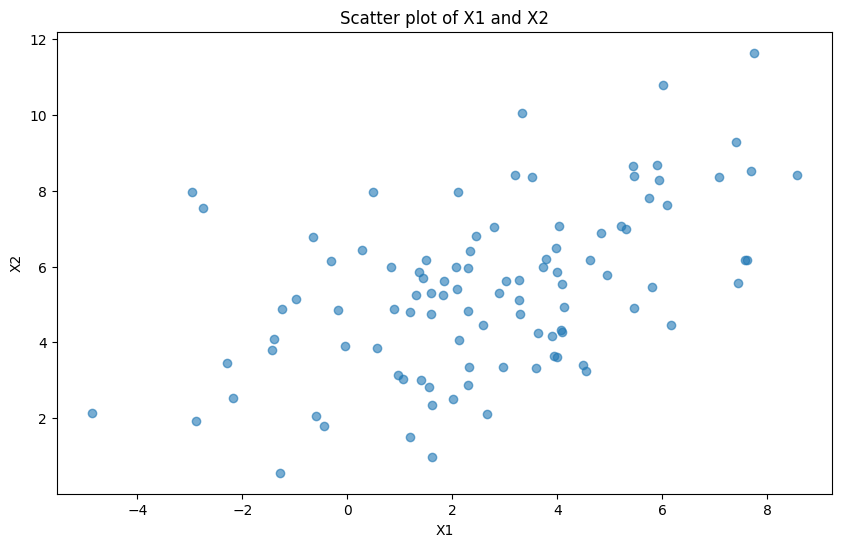

In [2]:
n=100
mu1=3
var1=9

mu2=4
var2=4

np.random.seed(42)

X1_samples=np.random.normal(mu1,np.sqrt(var1),n)

X2_noise=np.random.normal(mu2,np.sqrt(var2),n)

X2_samples=0.5*X1_samples+X2_noise

samples=np.column_stack((X1_samples,X2_samples))

plt.figure(figsize=(10,6))
plt.scatter(X1_samples,X2_samples,alpha=0.6)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter plot of X1 and X2')
plt.show()

# Compute the mean

In [3]:
X1_mean=X1_samples.mean()
X2_mean=X2_samples.mean()

print(f"X1_mean: {X1_mean}, X2_mean: {X2_mean}")




X1_mean: 2.6884604478177194, X2_mean: 5.388839398008706


# Compute the covariance matrix


In [4]:
# We know the MLE formula gives us:
# Sigma_Estimate=(1/n)* \sum_{i=1}^{n} (x_i-mu)(x_i-mu)^T

def compute_mle_covariance(samples):
    n=samples.shape[0]
    sample_mean=np.mean(samples,axis=0)

    centered_samples=samples-sample_mean

    cov_matrix=(1/n)*(np.dot(centered_samples.T,centered_samples))

    return cov_matrix

    

In [5]:
mle_covariance=compute_mle_covariance(samples)
print(mle_covariance)

[[7.34869975 2.97251397]
 [2.97251397 4.73689764]]


# Compute the eigenvalues and eigenvectors of the covariance matrix

In [6]:
eigenvalues,eigenvectors=np.linalg.eig(mle_covariance)

print(f"Eigenvalues: {eigenvalues}")
print(f"Eigenvectors: {eigenvectors}")




Eigenvalues: [9.28952272 2.79607467]
Eigenvectors: [[ 0.83732346 -0.54670781]
 [ 0.54670781  0.83732346]]


# Plot the eigenvectors

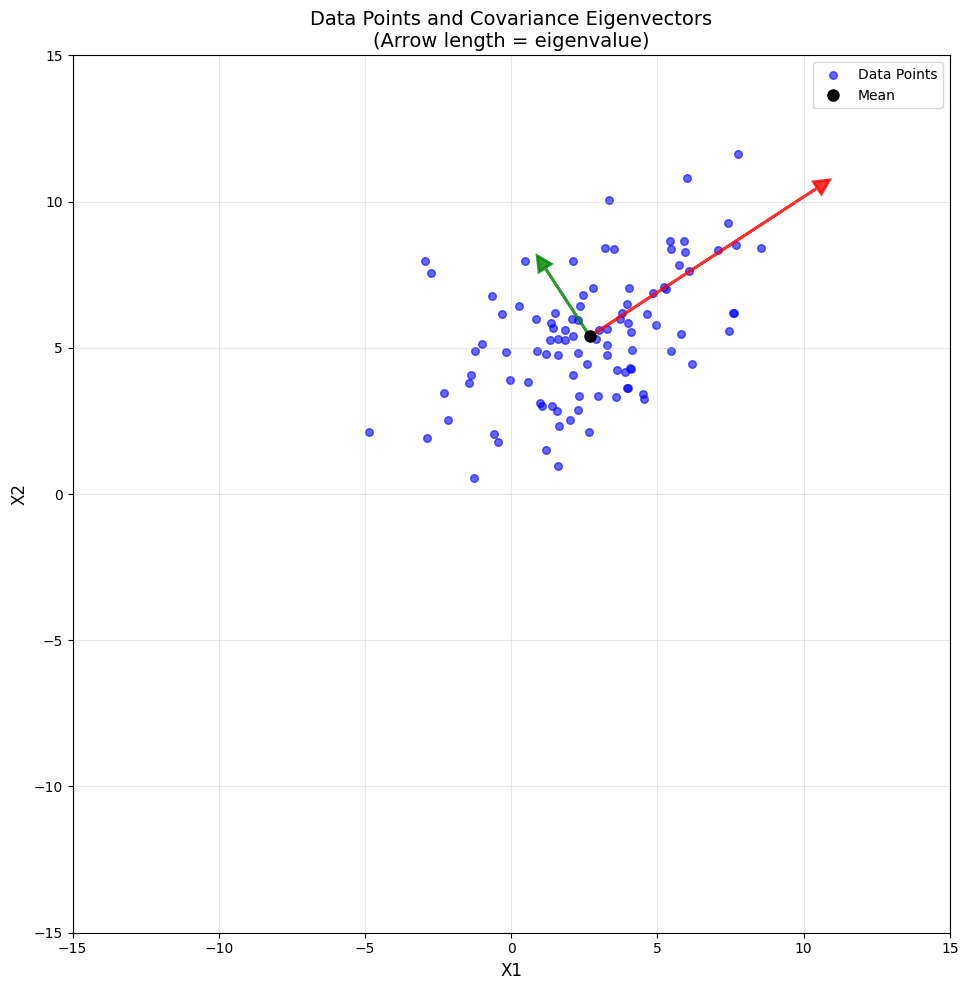

In [7]:
fig,ax=plt.subplots(figsize=(10,10))

ax.set_xlim(-15,15)
ax.set_ylim(-15,15)

ax.set_aspect('equal')

ax.scatter(samples[:,0],samples[:,1],alpha=0.6,s=30,c='blue',label='Data Points')

sample_mean_vector=[X1_mean,X2_mean]
origin=sample_mean_vector

eigenvec1=eigenvectors[:,0]
eigenvec2=eigenvectors[:,1]

eigenval1=eigenvalues[0]
eigenval2=eigenvalues[1]

arrow_length1=eigenval1
arrow_length2=eigenval2


ax.arrow(origin[0], origin[1], 
         eigenvec1[0] * arrow_length1, eigenvec1[1] * arrow_length1,
         head_width=0.5, head_length=0.5, 
         fc='red', ec='red', linewidth=2, alpha=0.8)

ax.arrow(origin[0], origin[1], 
         eigenvec2[0] * arrow_length2, eigenvec2[1] * arrow_length2,
         head_width=0.5, head_length=0.5, 
         fc='green', ec='green', linewidth=2, alpha=0.8)

ax.plot(origin[0], origin[1], 'ko', markersize=8, label='Mean')

ax.grid(True, alpha=0.3)
ax.set_xlabel('X1', fontsize=12)
ax.set_ylabel('X2', fontsize=12)
ax.set_title('Data Points and Covariance Eigenvectors\n(Arrow length = eigenvalue)', fontsize=14)
ax.legend()

plt.tight_layout()
plt.show()

# Rotation

In [8]:
def normalize_eigenvectors(eigenvalues,eigenvectors):
    normalized_eigenvectors=eigenvectors.copy()
    for i in range(eigenvectors.shape[1]):
        norm = np.linalg.norm(eigenvectors[:, i])
        normalized_eigenvectors[:, i] = eigenvectors[:, i] / norm
    return normalized_eigenvectors

def build_U_matrix(eigenvalues,eigenvectors):
    U=normalize_eigenvectors(eigenvalues,eigenvectors)
    return U,eigenvalues


def rotate(samples,sample_mean,U):
    centered_samples=samples-sample_mean
    return np.dot(centered_samples,U)


U,eigenvalues=build_U_matrix(eigenvalues=eigenvalues,eigenvectors=eigenvectors)

print("U matrix")
print(U)

rotated_samples = rotate(samples, sample_mean_vector, U)




U matrix
[[ 0.83732346 -0.54670781]
 [ 0.54670781  0.83732346]]


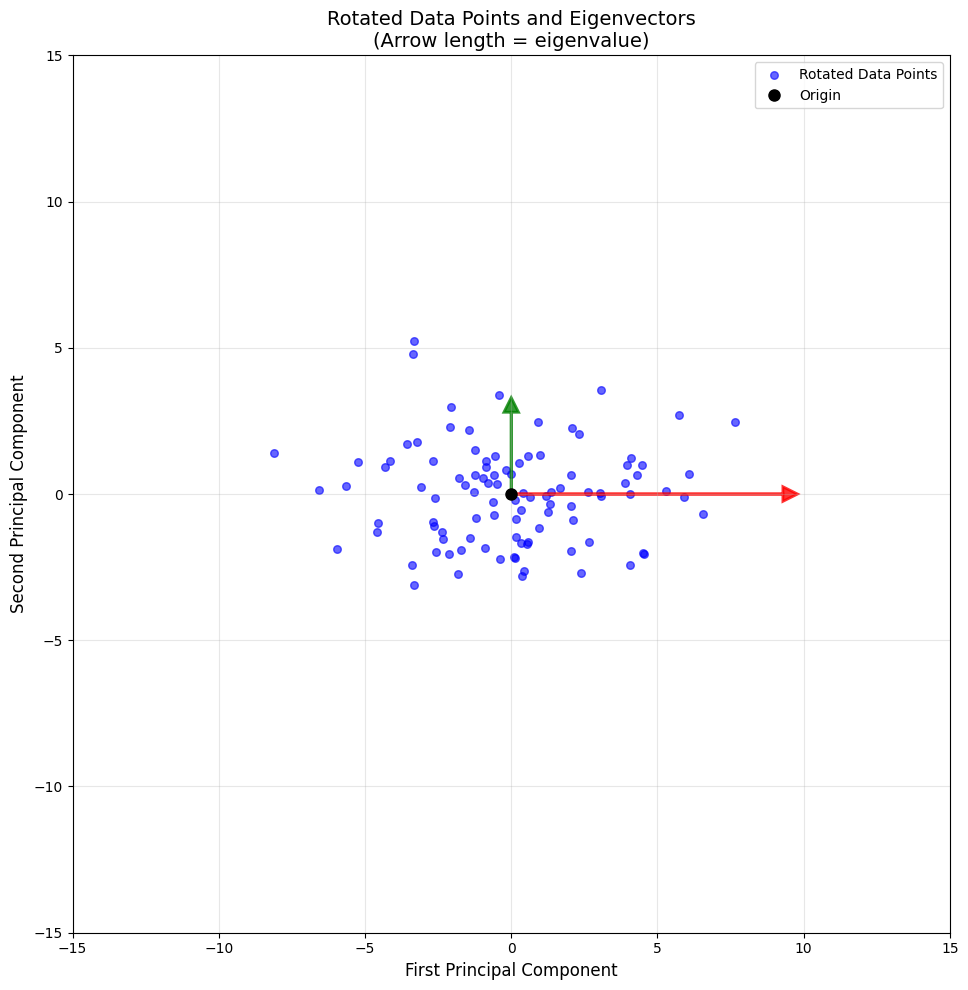

In [9]:
fig,ax=plt.subplots(figsize=(10,10))

ax.set_xlim(-15,15)
ax.set_ylim(-15,15)

ax.set_aspect('equal')

ax.scatter(rotated_samples[:,0],rotated_samples[:,1],alpha=0.6,s=30,c='blue',label='Rotated Data Points')

rotated_mean_vector=[0,0]
origin=rotated_mean_vector

eigenvec1_rotated=np.dot(U.T,eigenvectors[:,0])
eigenvec2_rotated=np.dot(U.T,eigenvectors[:,1])

eigenval1=eigenvalues[0]
eigenval2=eigenvalues[1]

arrow_length1=eigenval1
arrow_length2=eigenval2

ax.arrow(origin[0], origin[1], 
         eigenvec1_rotated[0] * arrow_length1, eigenvec1_rotated[1] * arrow_length1,
         head_width=0.5, head_length=0.5, 
         fc='red', ec='red', linewidth=2, alpha=0.8)

ax.arrow(origin[0], origin[1], 
         eigenvec2_rotated[0] * arrow_length2, eigenvec2_rotated[1] * arrow_length2,
         head_width=0.5, head_length=0.5, 
         fc='green', ec='green', linewidth=2, alpha=0.8)

ax.plot(origin[0], origin[1], 'ko', markersize=8, label='Origin')

ax.grid(True, alpha=0.3)
ax.set_xlabel('First Principal Component', fontsize=12)
ax.set_ylabel('Second Principal Component', fontsize=12)
ax.set_title('Rotated Data Points and Eigenvectors\n(Arrow length = eigenvalue)', fontsize=14)
ax.legend()

plt.tight_layout()
plt.show()